# Objective:

The goal of the "InstaCart Market Basket Analysis" is to predict which item and/or product will be next in future for user to buy.

Citation: "The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017"

In [6]:
#imports Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
#from mlxtend.frequent_patterns import apriori
#from mlxtend.frequent_patterns import association_rules

In [7]:
#import Dataset
train_df = pd.read_csv("data/order_products__train.csv")
prior_df = pd.read_csv("data/order_products__prior.csv")
aisles_df = pd.read_csv("data/aisles.csv")
orders_df = pd.read_csv("data/orders.csv")
departments_df = pd.read_csv("data/departments.csv")
products_df =  pd.read_csv("data/products.csv")

# EDA
Before we dive deep into EDA(Exploratory Data Analysis), Let's check what each dataset consists of.

In [45]:
train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [14]:
prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [14]:
orders_df.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


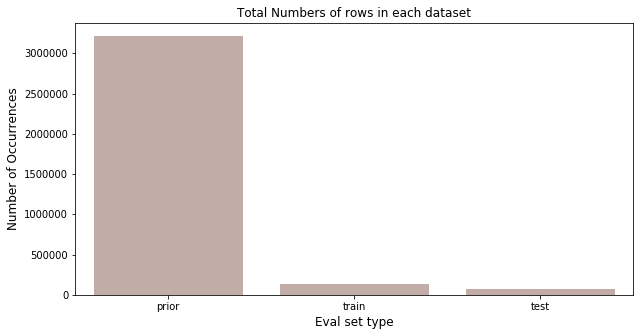

In [29]:
count = orders_df.eval_set.value_counts()
print(count)
#print(count.index,count.values)
plt.figure(figsize=(10,5))
sns.barplot(count.index,count.values,alpha=0.5,color = color[5])
plt.title("Total Numbers of rows in each dataset")
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Eval set type',fontsize=12)
plt.show()

In [16]:
def get_unique(x):
    return len(np.unique(x))

count = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique)
count

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

Here we can see that from total 20620 customers, We are provided to use 131209 data of the customers to build the model and 
can use 75000 Test Data to apply on built model to get the resulted ouput.

Now, Lets check how many orders are being placed(minimum and maximum orders). Additionally, Lets check how much time the 
occurance of same type of orders.

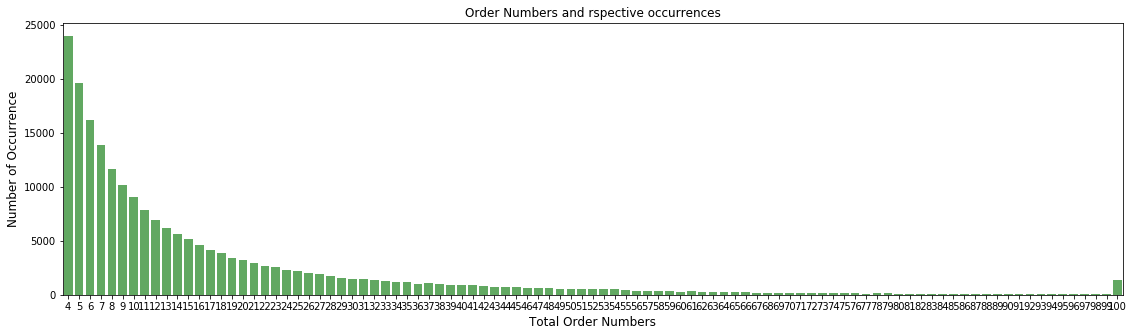

In [57]:
# To check per user what was the maximum order that was placed
count = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count
count = count.order_number.value_counts()
plt.figure(figsize=(19,5))
sns.barplot(count.index,count.values,alpha = 0.8,color = color[2])
plt.xlabel("Total Order Numbers",fontsize = 12)
plt.ylabel("Number of Occurrence",fontsize = 12)
plt.title("Order Numbers and rspective occurrences")
plt.show()


It is observed that there are no orders less than 4 and more than 100.

Now lets proceed towards the behavoir of the order numbers during varous day of the week.

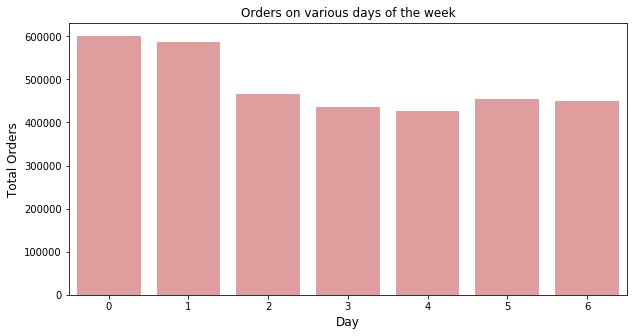

In [61]:
count = orders_df.order_dow.value_counts()
count
plt.figure(figsize=(10,5))
sns.barplot(count.index,count.values,alpha = 0.5,color = color[3])
plt.xlabel("Day",fontsize = 12)
plt.ylabel("Total Orders",fontsize = 12)
plt.title("Orders on various days of the week")
plt.show()

It shows that on Saturday and Sunday i.e. on 0 and 1 orders are high and on on Wednesday ordersa re super low.

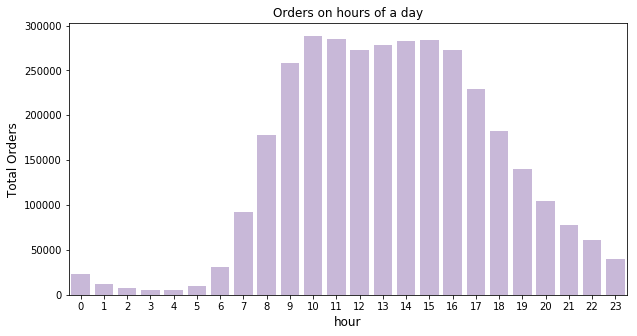

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x="order_hour_of_day",data= orders_df,alpha = 0.5,color = color[4])
plt.xlabel("hour",fontsize = 12)
plt.ylabel("Total Orders",fontsize = 12)
plt.title("Orders on hours of a day")
plt.show()

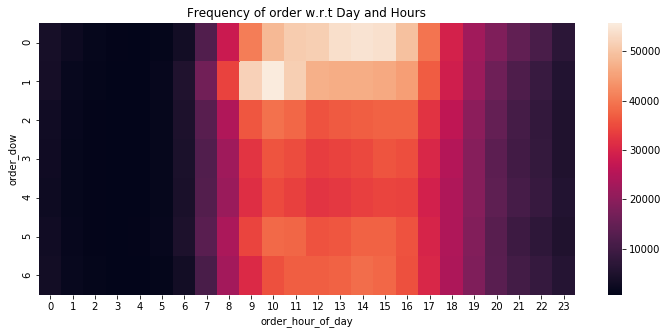

In [70]:
grp_df =  orders_df.groupby(["order_dow","order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grp_df = grp_df.pivot("order_dow","order_hour_of_day","order_number")
plt.figure(figsize=(12,5))
sns.heatmap(grp_df)
plt.title("Frequency of order w.r.t Day and Hours")
plt.show()